<a href="https://colab.research.google.com/github/kharisecario/practice/blob/gh-pages/Exploratory_data_Analysis_Flu_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis in Python.

## Let us understand how to explore the data in python.



![alt text](https://moriohcdn.b-cdn.net/ff3cc511fb.png)


Image Credits: Morioh

## Introduction

**What is Exploratory Data Analysis ?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

**How to perform Exploratory Data Analysis ?**

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

**What data are we exploring today ?**



Since I am a huge fan of cars, I got a very beautiful data-set of cars from Kaggle. The data-set can be downloaded from [here](https://www.kaggle.com/CooperUnion/cardataset). To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this tutorial, we will explore the data and make it ready for modeling.



---



## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)



---



## 2. Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sepsis data.csv to sepsis data.csv


In [ ]:
!ls

'555 sepsis dataset raw data.csv'   sample_data  'sepsis data.csv'


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['sepsis data.csv']),  encoding = 'utf8')


In [ ]:
#df = pd.read_csv("https://raw.githubusercontent.com/wujinja-cgu/FLu_ML_prediction/main/data_train.csv")

# To display the top 5 rows
df.head(5)

,age,tmp,pulse_center100,sbp_center120,dbp_center75,rr_center18,spao2,map_center100,gcs,angiopoietin2_norm,...,chills_final,bthypo,rdw145,rbc4,no_chills,charm,without_blooddrawn,doi_symptom,POD_in_15days,death
0,78,37.599998,121,2304,225,144.0,91.0,256.000000,15,0.018693,...,0,0,0,1,1,3,0,4,3.0,0
1,73,36.900002,225,1156,289,25.0,91.0,1067.110945,15,0.025059,...,0,0,0,1,1,2,0,11,2.0,0
2,71,38.299999,9,49,289,1.0,89.0,361.000000,15,0.048537,...,0,0,0,1,1,2,0,9,2.0,0
3,42,36.000000,1,100,1,0.0,92.0,196.000000,15,0.011248,...,0,0,0,0,1,1,0,8,2.0,0
4,89,38.299999,1849,1521,169,64.0,90.0,136.110874,4,0.049074,...,0,0,0,1,1,2,0,3,4.0,0


In [ ]:
df.tail(5)                        # To display the botton 5 rows

,age,tmp,pulse_center100,sbp_center120,dbp_center75,rr_center18,spao2,map_center100,gcs,angiopoietin2_norm,...,chills_final,bthypo,rdw145,rbc4,no_chills,charm,without_blooddrawn,doi_symptom,POD_in_15days,death
550,39,38.599998,64,1156,441,4.0,94.0,235.111423,15,0.066957,...,1,0,1,0,0,1,0,3,NaN,0
551,23,37.900002,1296,576,9,0.0,98.0,0.000000,15,0.007386,...,0,0,1,1,1,3,0,1,2.0,0
552,35,38.200001,49,324,1225,0.0,96.0,373.778171,15,0.109153,...,0,0,1,0,1,2,0,1,2.0,0
553,88,40.900002,81,81,16,36.0,94.0,245.444365,12,0.062431,...,0,0,0,0,1,1,0,1,2.0,0
554,98,38.000000,36,3136,4,49.0,97.0,100.000000,14,0.020793,...,0,0,0,0,1,1,0,0,3.0,1




---



## 3. Checking the types of data

Here we check for the datatypes because sometimes continuous variables would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [ ]:
df.dtypes

age                     int64
tmp                   float64
pulse_center100         int64
sbp_center120           int64
dbp_center75            int64
                       ...   
charm                   int64
without_blooddrawn      int64
doi_symptom             int64
POD_in_15days         float64
death                   int64
Length: 222, dtype: object



---



## 4. Dropping irrelevant columns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [ ]:
df.shape

(555, 222)

In [ ]:
# df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
# df.columns[0:20]
# df.iloc[:, 1:3]
df = df.drop(df.iloc[: , 22:222], axis=1)
# print(dff.shape)
df.head(5)

,age,tmp,pulse_center100,sbp_center120,dbp_center75,rr_center18,spao2,map_center100,gcs,angiopoietin2_norm,...,scd163_norm,il10_norm,pentraxin3_norm,ifnr_norm,il8_norm,cd14_norm,trem1_norm,cd64_norm,icam1_norm,eselectin_norm
0,78,37.599998,121,2304,225,144.0,91.0,256.000000,15,0.018693,...,0.706226,7.709830e-04,0.452791,-6.150000e-11,0.002106,0.766344,0.220696,0.114197,0.386134,0.143056
1,73,36.900002,225,1156,289,25.0,91.0,1067.110945,15,0.025059,...,0.401446,3.400000e-14,0.067442,-6.150000e-11,0.000881,0.434483,0.419982,0.080082,0.352273,0.063109
2,71,38.299999,9,49,289,1.0,89.0,361.000000,15,0.048537,...,0.099617,1.894990e-04,0.067316,-6.150000e-11,0.001617,0.341573,0.249263,0.016266,0.494109,0.030300
3,42,36.000000,1,100,1,0.0,92.0,196.000000,15,0.011248,...,0.190677,3.400000e-14,0.133090,-6.150000e-11,0.001457,0.773797,0.151258,0.033429,0.229695,0.037400
4,89,38.299999,1849,1521,169,64.0,90.0,136.110874,4,0.049074,...,0.148677,3.981789e-03,0.498091,-6.150000e-11,0.001687,0.346672,0.076242,0.036954,0.048064,0.029035




---



## 5. Renaming the columns

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [ ]:
# df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
# df.head(5)



---



## 6. Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [ ]:
df.shape

(555, 22)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 22)


Now let us remove the duplicate data because it's ok to remove them.

In [ ]:
df.count()      # Used to count the number of rows

age                   555
tmp                   555
pulse_center100       555
sbp_center120         555
dbp_center75          555
rr_center18           552
spao2                 544
map_center100         555
gcs                   555
angiopoietin2_norm    555
il6_norm              555
tnfa_norm             555
scd163_norm           555
il10_norm             555
pentraxin3_norm       555
ifnr_norm             555
il8_norm              555
cd14_norm             555
trem1_norm            555
cd64_norm             555
icam1_norm            555
eselectin_norm        555
dtype: int64

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [ ]:
df = df.drop_duplicates()
df.head(5)

,age,tmp,pulse_center100,sbp_center120,dbp_center75,rr_center18,spao2,map_center100,gcs,angiopoietin2_norm,...,scd163_norm,il10_norm,pentraxin3_norm,ifnr_norm,il8_norm,cd14_norm,trem1_norm,cd64_norm,icam1_norm,eselectin_norm
0,78,37.599998,121,2304,225,144.0,91.0,256.000000,15,0.018693,...,0.706226,7.709830e-04,0.452791,-6.150000e-11,0.002106,0.766344,0.220696,0.114197,0.386134,0.143056
1,73,36.900002,225,1156,289,25.0,91.0,1067.110945,15,0.025059,...,0.401446,3.400000e-14,0.067442,-6.150000e-11,0.000881,0.434483,0.419982,0.080082,0.352273,0.063109
2,71,38.299999,9,49,289,1.0,89.0,361.000000,15,0.048537,...,0.099617,1.894990e-04,0.067316,-6.150000e-11,0.001617,0.341573,0.249263,0.016266,0.494109,0.030300
3,42,36.000000,1,100,1,0.0,92.0,196.000000,15,0.011248,...,0.190677,3.400000e-14,0.133090,-6.150000e-11,0.001457,0.773797,0.151258,0.033429,0.229695,0.037400
4,89,38.299999,1849,1521,169,64.0,90.0,136.110874,4,0.049074,...,0.148677,3.981789e-03,0.498091,-6.150000e-11,0.001687,0.346672,0.076242,0.036954,0.048064,0.029035


In [ ]:
df.count()

age                   555
tmp                   555
pulse_center100       555
sbp_center120         555
dbp_center75          555
rr_center18           552
spao2                 544
map_center100         555
gcs                   555
angiopoietin2_norm    555
il6_norm              555
tnfa_norm             555
scd163_norm           555
il10_norm             555
pentraxin3_norm       555
ifnr_norm             555
il8_norm              555
cd14_norm             555
trem1_norm            555
cd64_norm             555
icam1_norm            555
eselectin_norm        555
dtype: int64



---



## 7. Dropping the missing or null values.

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [ ]:
print(df.isnull().sum())

age                    0
tmp                    0
pulse_center100        0
sbp_center120          0
dbp_center75           0
rr_center18            3
spao2                 11
map_center100          0
gcs                    0
angiopoietin2_norm     0
il6_norm               0
tnfa_norm              0
scd163_norm            0
il10_norm              0
pentraxin3_norm        0
ifnr_norm              0
il8_norm               0
cd14_norm              0
trem1_norm             0
cd64_norm              0
icam1_norm             0
eselectin_norm         0
dtype: int64


This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

age                   542
tmp                   542
pulse_center100       542
sbp_center120         542
dbp_center75          542
rr_center18           542
spao2                 542
map_center100         542
gcs                   542
angiopoietin2_norm    542
il6_norm              542
tnfa_norm             542
scd163_norm           542
il10_norm             542
pentraxin3_norm       542
ifnr_norm             542
il8_norm              542
cd14_norm             542
trem1_norm            542
cd64_norm             542
icam1_norm            542
eselectin_norm        542
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [ ]:
print(df.isnull().sum())   # After dropping the values

age                   0
tmp                   0
pulse_center100       0
sbp_center120         0
dbp_center75          0
rr_center18           0
spao2                 0
map_center100         0
gcs                   0
angiopoietin2_norm    0
il6_norm              0
tnfa_norm             0
scd163_norm           0
il10_norm             0
pentraxin3_norm       0
ifnr_norm             0
il8_norm              0
cd14_norm             0
trem1_norm            0
cd64_norm             0
icam1_norm            0
eselectin_norm        0
dtype: int64


In [ ]:
# df_ex0 = df.iloc[:,0:3]
# df_ex0

,heightcm,weightkg,as_edenroll_temp
0,156.9720,59.874193,38.7
1,165.1000,119.294793,36.4
2,167.6400,145.149558,38.6
3,164.9984,51.999829,35.6
4,167.6400,54.431084,36.6
...,...,...,...
1526,182.8800,113.397500,37.8
1527,154.9908,54.997788,38.7
1528,185.4200,72.574400,37.4
1529,163.8300,99.789800,37.3




---



## 8. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

<Axes: xlabel='spao2'>

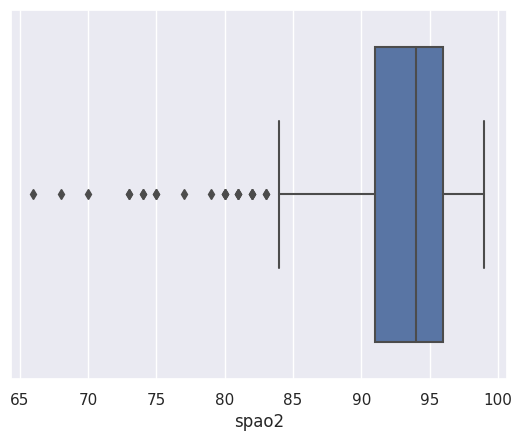

In [ ]:
sns.boxplot(x = df['spao2'])

<Axes: xlabel='age'>

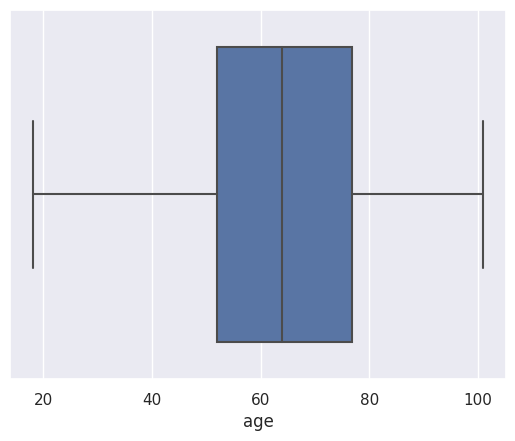

In [ ]:
sns.boxplot(x=df['age'])

<Axes: xlabel='map_center100'>

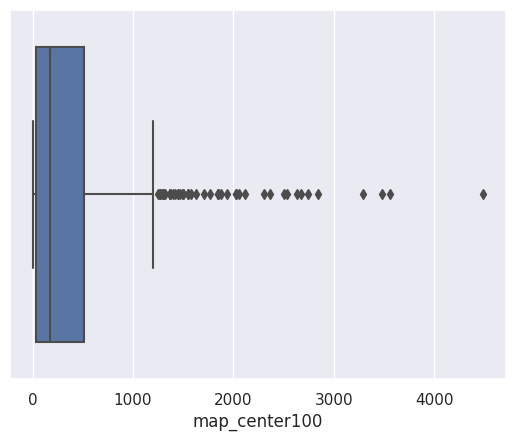

In [ ]:
sns.boxplot(x=df['map_center100'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                   2.475000e+01
tmp                   1.800003e+00
pulse_center100       6.120000e+02
sbp_center120         1.323000e+03
dbp_center75          3.360000e+02
rr_center18           1.500000e+01
spao2                 5.000000e+00
map_center100         4.777777e+02
gcs                   0.000000e+00
angiopoietin2_norm    6.107349e-02
il6_norm              3.363096e-03
tnfa_norm             6.478627e-02
scd163_norm           1.655461e-01
il10_norm             1.341529e-03
pentraxin3_norm       1.938272e-01
ifnr_norm             1.136000e-10
il8_norm              1.698750e-03
cd14_norm             2.212949e-01
trem1_norm            1.583460e-01
cd64_norm             2.064859e-01
icam1_norm            1.629415e-01
eselectin_norm        8.264782e-02
dtype: float64


In [ ]:
# original  N = 1531
df

,age,tmp,pulse_center100,sbp_center120,dbp_center75,rr_center18,spao2,map_center100,gcs,angiopoietin2_norm,...,scd163_norm,il10_norm,pentraxin3_norm,ifnr_norm,il8_norm,cd14_norm,trem1_norm,cd64_norm,icam1_norm,eselectin_norm
0,78,37.599998,121,2304,225,144.0,91.0,256.000000,15,0.018693,...,7.062256e-01,7.709830e-04,0.452791,-6.150000e-11,0.002106,0.766344,0.220696,0.114197,0.386134,0.143056
1,73,36.900002,225,1156,289,25.0,91.0,1067.110945,15,0.025059,...,4.014460e-01,3.400000e-14,0.067442,-6.150000e-11,0.000881,0.434483,0.419982,0.080082,0.352273,0.063109
2,71,38.299999,9,49,289,1.0,89.0,361.000000,15,0.048537,...,9.961684e-02,1.894990e-04,0.067316,-6.150000e-11,0.001617,0.341573,0.249263,0.016266,0.494109,0.030300
3,42,36.000000,1,100,1,0.0,92.0,196.000000,15,0.011248,...,1.906770e-01,3.400000e-14,0.133090,-6.150000e-11,0.001457,0.773797,0.151258,0.033429,0.229695,0.037400
4,89,38.299999,1849,1521,169,64.0,90.0,136.110874,4,0.049074,...,1.486765e-01,3.981789e-03,0.498091,-6.150000e-11,0.001687,0.346672,0.076242,0.036954,0.048064,0.029035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,39,38.599998,64,1156,441,4.0,94.0,235.111423,15,0.066957,...,4.489049e-01,5.215980e-04,0.033373,2.110000e-11,0.001097,0.411012,0.000299,0.275795,0.132944,0.029403
551,23,37.900002,1296,576,9,0.0,98.0,0.000000,15,0.007386,...,-3.920000e-10,5.360000e-05,0.050087,9.425070e-04,0.000294,0.159988,0.000299,0.147806,0.027026,0.012839
552,35,38.200001,49,324,1225,0.0,96.0,373.778171,15,0.109153,...,6.966172e-02,3.498441e-03,0.108298,2.110000e-11,0.002130,0.225171,0.000299,0.359028,0.064544,0.181518
553,88,40.900002,81,81,16,36.0,94.0,245.444365,12,0.062431,...,2.146659e-01,5.930940e-04,0.198666,6.597550e-03,0.001405,0.479446,0.103672,0.283826,0.143296,0.078809


In [ ]:
from scipy.stats import zscore

In [ ]:
# clean by 3 sd
df_less_3sd = df[(np.abs(zscore(df)) < 3).all(axis=1)]
df_less_3sd

,age,tmp,pulse_center100,sbp_center120,dbp_center75,rr_center18,spao2,map_center100,gcs,angiopoietin2_norm,...,scd163_norm,il10_norm,pentraxin3_norm,ifnr_norm,il8_norm,cd14_norm,trem1_norm,cd64_norm,icam1_norm,eselectin_norm
1,73,36.900002,225,1156,289,25.0,91.0,1067.110945,15,0.025059,...,4.014460e-01,3.400000e-14,0.067442,-6.150000e-11,0.000881,0.434483,0.419982,0.080082,0.352273,0.063109
2,71,38.299999,9,49,289,1.0,89.0,361.000000,15,0.048537,...,9.961684e-02,1.894990e-04,0.067316,-6.150000e-11,0.001617,0.341573,0.249263,0.016266,0.494109,0.030300
3,42,36.000000,1,100,1,0.0,92.0,196.000000,15,0.011248,...,1.906770e-01,3.400000e-14,0.133090,-6.150000e-11,0.001457,0.773797,0.151258,0.033429,0.229695,0.037400
9,58,39.299999,256,9,144,1.0,98.0,289.000000,15,0.109966,...,2.101784e-01,3.973730e-04,0.307133,-6.150000e-11,0.001389,0.444534,0.105472,0.025747,0.392241,0.167310
12,46,38.500000,64,841,169,0.0,94.0,69.444614,15,0.078111,...,4.544407e-01,2.686792e-03,0.354426,-6.150000e-11,0.001210,0.563660,0.055403,0.038672,0.177295,0.089808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,39,38.599998,64,1156,441,4.0,94.0,235.111423,15,0.066957,...,4.489049e-01,5.215980e-04,0.033373,2.110000e-11,0.001097,0.411012,0.000299,0.275795,0.132944,0.029403
551,23,37.900002,1296,576,9,0.0,98.0,0.000000,15,0.007386,...,-3.920000e-10,5.360000e-05,0.050087,9.425070e-04,0.000294,0.159988,0.000299,0.147806,0.027026,0.012839
552,35,38.200001,49,324,1225,0.0,96.0,373.778171,15,0.109153,...,6.966172e-02,3.498441e-03,0.108298,2.110000e-11,0.002130,0.225171,0.000299,0.359028,0.064544,0.181518
553,88,40.900002,81,81,16,36.0,94.0,245.444365,12,0.062431,...,2.146659e-01,5.930940e-04,0.198666,6.597550e-03,0.001405,0.479446,0.103672,0.283826,0.143296,0.078809


In [ ]:
# for df_ex0: with variables:heightcm	weightkg	as_edenroll_temp

In [ ]:
# ver1 use 3*sd
df_less_3sd.shape

(401, 22)

In [ ]:
# clean by 1.5 IQR
df_clean_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean_IQR

,age,tmp,pulse_center100,sbp_center120,dbp_center75,rr_center18,spao2,map_center100,gcs,angiopoietin2_norm,...,scd163_norm,il10_norm,pentraxin3_norm,ifnr_norm,il8_norm,cd14_norm,trem1_norm,cd64_norm,icam1_norm,eselectin_norm
1,73,36.900002,225,1156,289,25.0,91.0,1067.110945,15,0.025059,...,0.401446,3.400000e-14,0.067442,-6.150000e-11,0.000881,0.434483,4.199820e-01,0.080082,0.352273,0.063109
9,58,39.299999,256,9,144,1.0,98.0,289.000000,15,0.109966,...,0.210178,3.973730e-04,0.307133,-6.150000e-11,0.001389,0.444534,1.054722e-01,0.025747,0.392241,0.167310
12,46,38.500000,64,841,169,0.0,94.0,69.444614,15,0.078111,...,0.454441,2.686792e-03,0.354426,-6.150000e-11,0.001210,0.563660,5.540273e-02,0.038672,0.177295,0.089808
23,46,39.099998,81,64,361,1.0,97.0,641.777907,15,0.022151,...,0.076035,9.030110e-04,0.210246,-6.150000e-11,0.000459,0.251747,9.888335e-02,0.017335,0.139964,0.227234
27,61,38.099998,1,256,289,0.0,94.0,711.110975,15,0.013840,...,0.071161,1.894990e-04,0.049734,-6.150000e-11,0.000418,0.243398,-1.310000e-10,0.107594,0.070351,0.009041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,46,39.900002,121,64,4,16.0,91.0,196.000000,15,0.097884,...,0.277407,5.930940e-04,0.035573,2.110000e-11,0.000894,0.104115,2.986270e-04,0.102992,0.342720,0.030865
540,42,38.900002,256,169,196,1.0,95.0,560.110991,15,0.058561,...,0.147196,2.941100e-04,0.131778,2.110000e-11,0.000441,0.430087,2.986270e-04,0.203067,0.401125,0.064979
541,28,38.900002,1296,196,121,0.0,98.0,484.000000,15,0.016786,...,0.064610,2.941100e-04,0.145653,2.110000e-11,0.000592,0.213521,1.535046e-01,0.274881,0.044798,0.115821
542,74,37.700001,1369,289,100,36.0,93.0,5.444492,15,0.016815,...,0.084885,8.790790e-04,0.067230,2.110000e-11,0.000996,0.196771,8.076073e-02,0.162051,0.094387,0.061741


Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [ ]:
# df_clean_IQR.shape

(134, 22)

In [ ]:
# oginal :
df.shape

(542, 22)

In [ ]:
# clean by +- 3*sd
df_less_3sd.shape

(401, 22)

In [ ]:
# clean by IQR
df_clean_IQR.shape

(134, 22)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.



---



## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

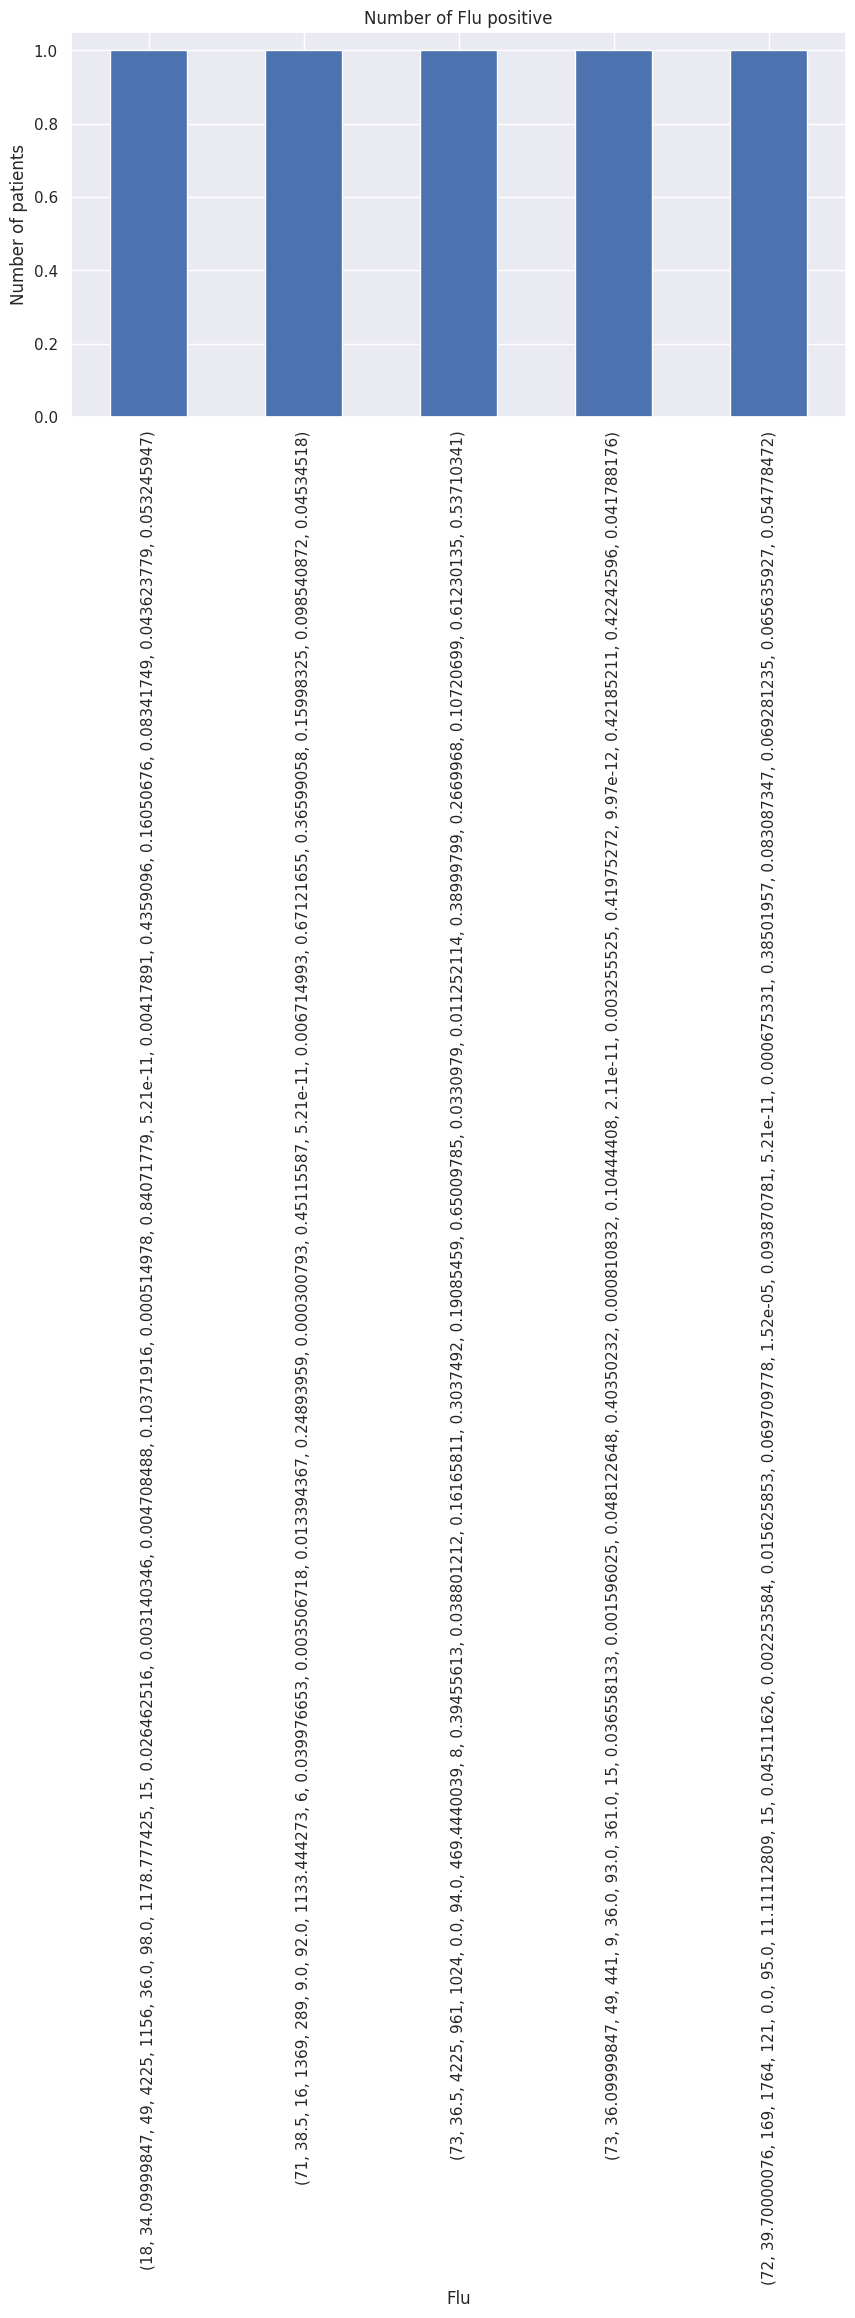

In [ ]:
df.value_counts().nlargest().plot(kind='bar', figsize=(10,5))
plt.title("Number of Flu positive")
plt.ylabel('Number of patients')
plt.xlabel('Flu');

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,age,tmp,pulse_center100,sbp_center120,dbp_center75,rr_center18,spao2,map_center100,gcs,angiopoietin2_norm,...,scd163_norm,il10_norm,pentraxin3_norm,ifnr_norm,il8_norm,cd14_norm,trem1_norm,cd64_norm,icam1_norm,eselectin_norm
age,1.000000,-0.032691,-0.061317,0.070236,-0.063710,0.181908,-0.228516,0.010947,-0.310455,-0.009793,...,0.102794,-0.012454,0.070362,-0.056110,-0.027292,-0.016411,0.171705,0.144843,-0.043310,-0.042296
tmp,-0.032691,1.000000,0.166698,0.013509,-0.082879,0.040671,-0.020990,-0.110477,0.029777,-0.029250,...,-0.041974,0.047689,0.064229,0.079988,0.027673,0.000898,-0.122198,0.069321,-0.032063,0.174591
pulse_center100,-0.061317,0.166698,1.000000,0.032746,0.075834,0.312401,-0.125046,0.097465,-0.096140,0.107276,...,0.056817,0.246994,0.232057,-0.020783,0.345583,0.069466,0.064995,0.081776,0.095302,0.184673
sbp_center120,0.070236,0.013509,0.032746,1.000000,0.472663,0.057468,-0.004933,0.588454,0.040195,-0.020522,...,0.033827,0.019648,0.025268,-0.003941,0.041711,-0.036054,0.151218,0.082261,-0.092625,-0.019507
dbp_center75,-0.063710,-0.082879,0.075834,0.472663,1.000000,0.060285,0.009562,0.797622,-0.041621,0.105078,...,0.109343,0.064195,0.081217,-0.043629,0.138226,-0.016595,0.129043,0.045994,0.017308,0.005435
rr_center18,0.181908,0.040671,0.312401,0.057468,0.060285,1.000000,-0.269434,0.064799,-0.187502,0.108962,...,0.092602,0.130610,0.269251,-0.023222,0.262489,-0.021157,0.123958,0.001333,-0.029377,-0.015377
spao2,-0.228516,-0.020990,-0.125046,-0.004933,0.009562,-0.269434,1.000000,-0.029616,0.042410,-0.044474,...,-0.049781,-0.085836,-0.148625,-0.018327,-0.114619,0.015370,-0.079317,0.046766,-0.023116,0.032563
map_center100,0.010947,-0.110477,0.097465,0.588454,0.797622,0.064799,-0.029616,1.000000,-0.050882,0.135807,...,0.143422,0.158734,0.126319,-0.025473,0.204650,0.031594,0.226213,0.133315,0.067058,0.081609
gcs,-0.310455,0.029777,-0.096140,0.040195,-0.041621,-0.187502,0.042410,-0.050882,1.000000,-0.005392,...,-0.020991,0.038018,-0.082174,0.068694,0.027206,-0.085602,-0.043744,-0.140327,0.052724,0.071142
angiopoietin2_norm,-0.009793,-0.029250,0.107276,-0.020522,0.105078,0.108962,-0.044474,0.135807,-0.005392,1.000000,...,0.246919,0.215788,0.415733,0.005849,0.265029,0.238234,0.313149,0.151552,0.281277,0.507877


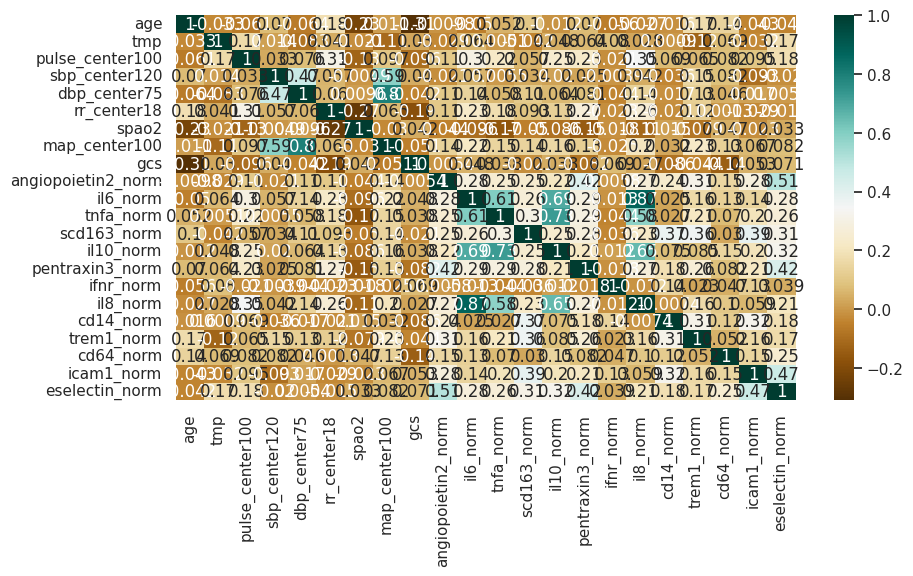

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
# from IPython.display import Image
# Image(filename="SHAP.png")

In [ ]:
# focus  SHAP top 5
# choose SHAP top 5 :
# GeneXpert
# as_edenroll_temp
# cursympt_cough
# WOS
# cursympt_days
# cursympt_rhinorrhea
col_need = ['GeneXpert','as_edenroll_temp','cursympt_cough','WOS','cursympt_days','cursympt_rhinorrhea']
df_SHAP_top5 = df.loc[:, col_need]
df_SHAP_top5

,GeneXpert,as_edenroll_temp,cursympt_cough,WOS,cursympt_days,cursympt_rhinorrhea
0,1,38.7,1,7,2.0,1
1,0,36.4,0,3,2.5,1
2,0,38.6,1,12,3.0,0
3,1,35.6,1,2,2.0,1
4,0,36.6,1,51,2.0,0
...,...,...,...,...,...,...
1526,1,37.8,1,3,7.0,1
1527,1,38.7,1,5,7.0,1
1528,1,37.4,1,11,2.0,0
1529,1,37.3,1,15,4.0,1


,GeneXpert,as_edenroll_temp,cursympt_cough,WOS,cursympt_days,cursympt_rhinorrhea
GeneXpert,1.000000,0.162536,0.279816,-0.065941,-0.109444,0.141001
as_edenroll_temp,0.162536,1.000000,-0.012847,0.027118,-0.180840,-0.097326
cursympt_cough,0.279816,-0.012847,1.000000,0.026584,0.095747,0.283548
WOS,-0.065941,0.027118,0.026584,1.000000,0.010849,-0.000697
cursympt_days,-0.109444,-0.180840,0.095747,0.010849,1.000000,0.077066
cursympt_rhinorrhea,0.141001,-0.097326,0.283548,-0.000697,0.077066,1.000000


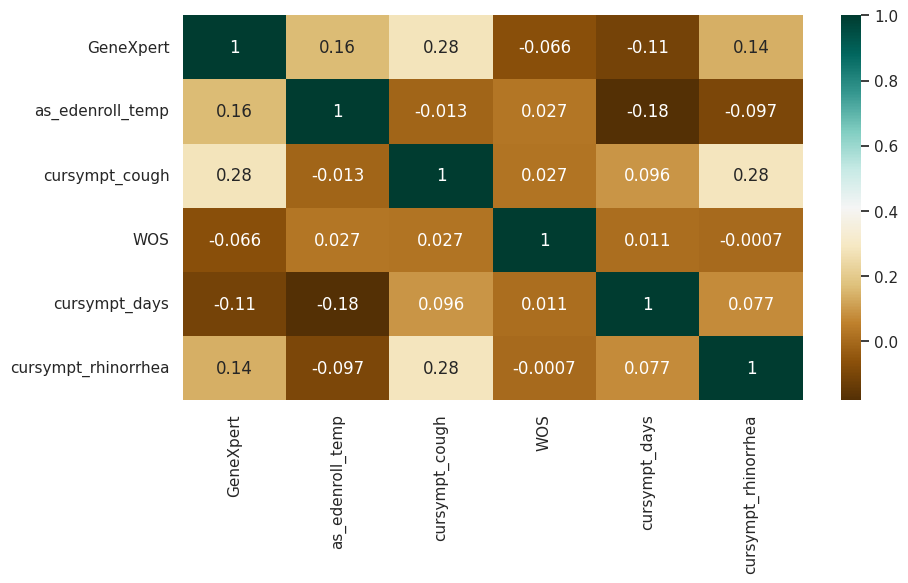

In [ ]:
plt.figure(figsize=(10,5))
c= df_SHAP_top5.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

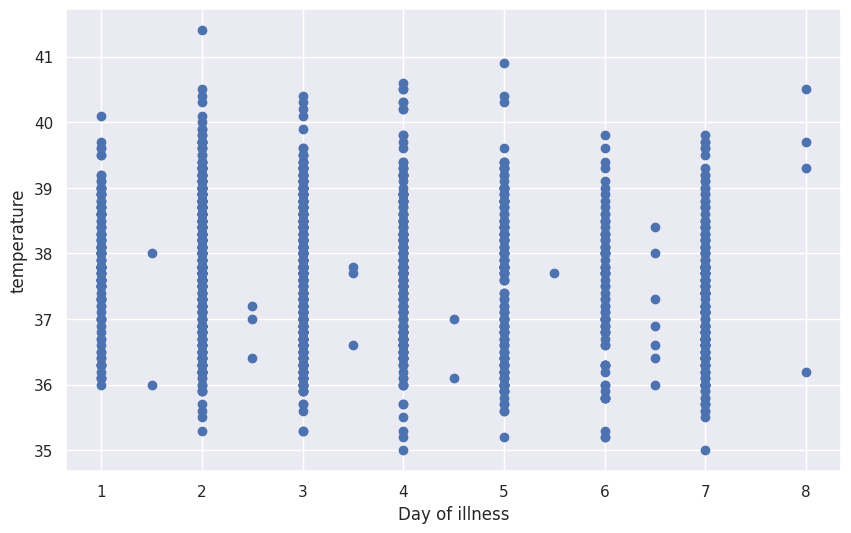

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['cursympt_days'], df['as_edenroll_temp'])
ax.set_xlabel('Day of illness')
ax.set_ylabel('temperature')
plt.show()

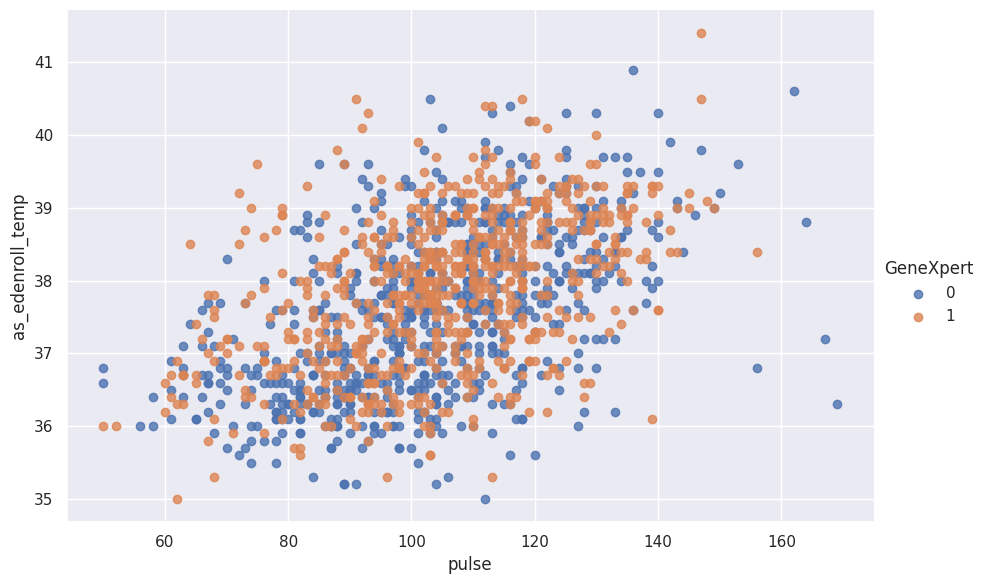

In [ ]:

sns.lmplot(data=df, x = 'pulse', y = 'as_edenroll_temp',  hue='GeneXpert', fit_reg=False, height=6, aspect=1.5)
plt.show()

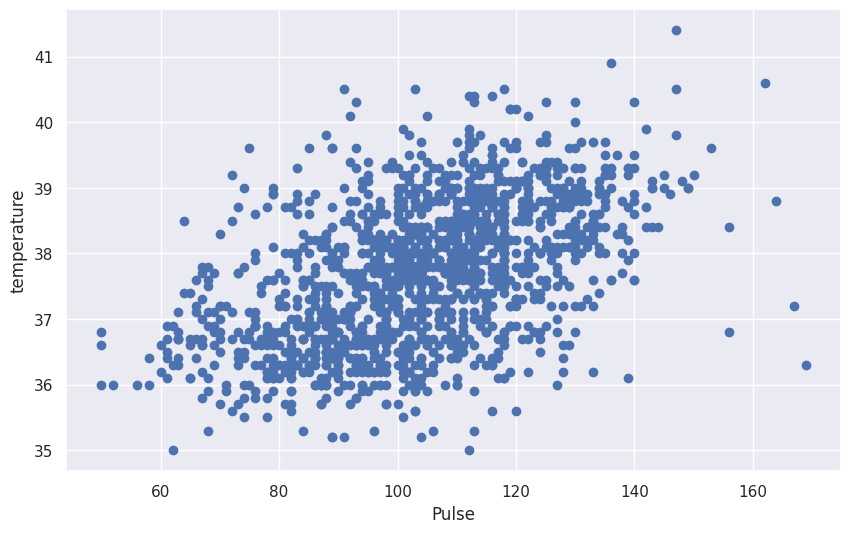

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['pulse'], df['as_edenroll_temp'])
ax.set_xlabel('Pulse')
ax.set_ylabel('temperature')
plt.show()

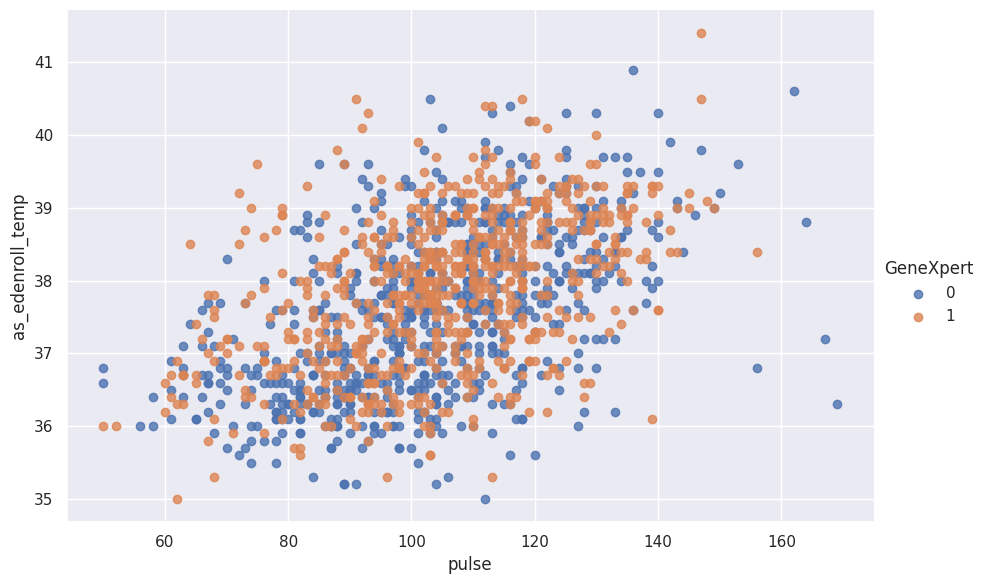

In [ ]:

sns.lmplot(data=df , x = 'pulse', y = 'as_edenroll_temp', hue='GeneXpert', fit_reg=False, height=6, aspect=1.5)
plt.show()


In [ ]:
# part 2
boston_pd = df

boston_pd.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
heightcm,1531.0,166.796707,9.854619,124.46000,159.994600,165.989000,172.99940,201.168000
weightkg,1531.0,76.139504,23.056499,15.87565,59.874193,72.574779,86.18255,215.909968
as_edenroll_temp,1531.0,37.701110,1.047620,35.00000,36.900000,37.800000,38.40000,41.400000
pulse,1531.0,103.863488,17.832710,50.00000,93.000000,103.000000,115.00000,169.000000
rr,1531.0,18.549967,2.166731,12.00000,18.000000,18.000000,20.00000,32.000000
sbp,1531.0,133.763553,22.410758,76.00000,119.000000,130.000000,144.00000,237.000000
o2s,1531.0,96.692358,2.549651,65.00000,96.000000,97.000000,98.00000,100.000000
season,1531.0,3.024167,1.291021,1.00000,2.000000,4.000000,4.00000,4.000000
WOS,1531.0,18.310255,17.787997,1.00000,5.000000,10.000000,29.00000,53.000000
cursympt_days,1531.0,3.689745,1.821643,1.00000,2.000000,3.000000,5.00000,8.000000


In [ ]:
boston_pd.GeneXpert.value_counts()

1    793
0    738
Name: GeneXpert, dtype: int64

In [ ]:
print(boston_pd.nunique())

heightcm                137
weightkg                470
as_edenroll_temp         57
pulse                   100
rr                       18
sbp                     127
o2s                      22
season                    4
WOS                      48
cursympt_days            14
fluvaccine                2
exposehuman               2
travel                    2
cursympt_cough            2
cursympt_coughsputum      2
cursympt_sorethroat       2
cursympt_rhinorrhea       2
cursympt_sinuspain        2
medhistav                 2
pastmedchronlundis        2
GeneXpert                 2
dtype: int64


In [ ]:
boston_pd[boston_pd.isnull().any(axis=1)]

,heightcm,weightkg,as_edenroll_temp,pulse,rr,sbp,o2s,season,WOS,cursympt_days,...,exposehuman,travel,cursympt_cough,cursympt_coughsputum,cursympt_sorethroat,cursympt_rhinorrhea,cursympt_sinuspain,medhistav,pastmedchronlundis,GeneXpert


In [ ]:
boston_pd.isnull().sum()

heightcm                0
weightkg                0
as_edenroll_temp        0
pulse                   0
rr                      0
sbp                     0
o2s                     0
season                  0
WOS                     0
cursympt_days           0
fluvaccine              0
exposehuman             0
travel                  0
cursympt_cough          0
cursympt_coughsputum    0
cursympt_sorethroat     0
cursympt_rhinorrhea     0
cursympt_sinuspain      0
medhistav               0
pastmedchronlundis      0
GeneXpert               0
dtype: int64

In [ ]:
total = boston_pd.isnull().sum().sort_values(ascending=False)
percent = (boston_pd.isnull().sum()/boston_pd.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,
                         keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
heightcm,0,0.0
exposehuman,0,0.0
pastmedchronlundis,0,0.0
medhistav,0,0.0
cursympt_sinuspain,0,0.0
cursympt_rhinorrhea,0,0.0
cursympt_sorethroat,0,0.0
cursympt_coughsputum,0,0.0
cursympt_cough,0,0.0
travel,0,0.0


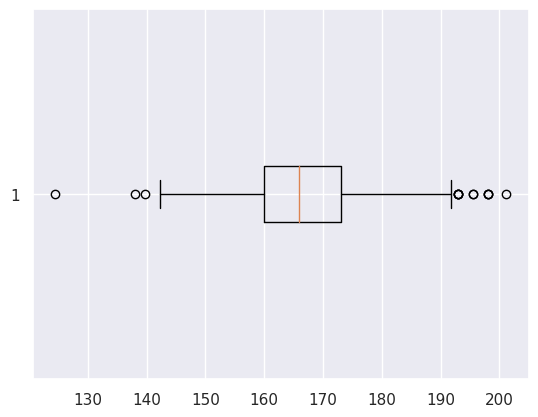

In [ ]:
plt.boxplot(list(boston_pd.heightcm),vert = False);
plt.show();

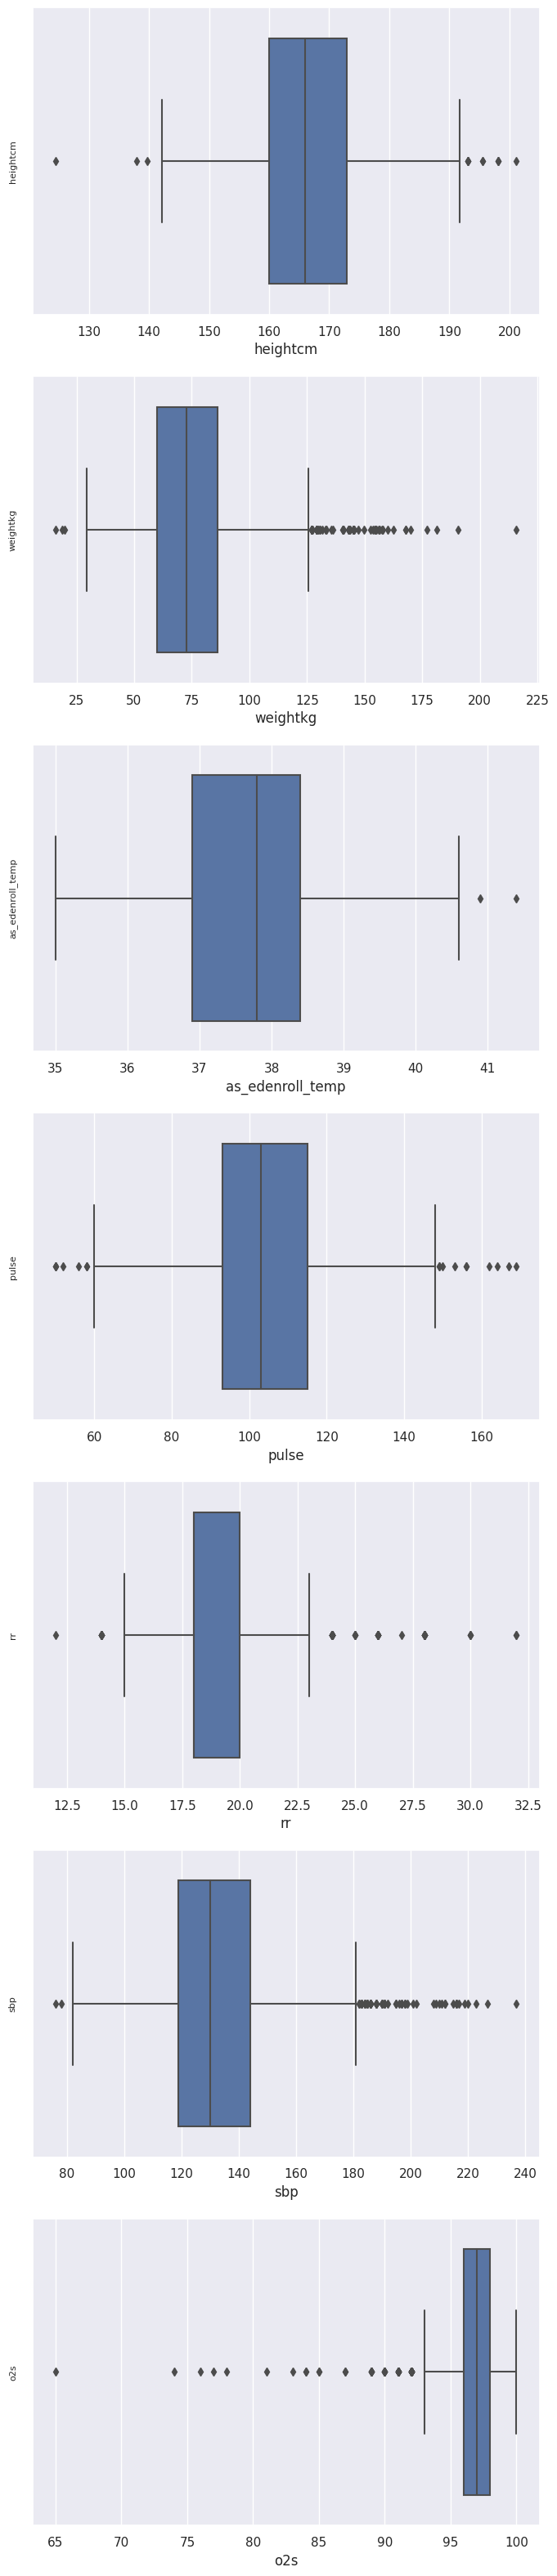

In [ ]:
# show some continuous variables 'heightcm','weightkg', 'as_edenroll_temp', 'pulse', 'rr', 'sbp', 'o2s'
fig,  ax = plt.subplots(len(list(boston_pd.columns)[0:7]), figsize=(8,40))

for i, feature_name in enumerate(list(boston_pd.columns)[0:7]):
    sns.boxplot(x=boston_pd[feature_name], ax=ax[i]);
    ax[i].set_ylabel(feature_name, fontsize=8);
    #ax[i].set_title("Box plot {} ".format(feature_name), fontsize=8);

plt.show();

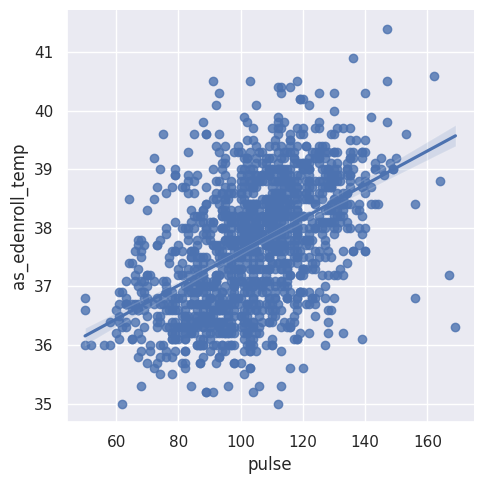

In [ ]:
sns.lmplot(x = 'pulse', y = 'as_edenroll_temp', data = boston_pd)

In [ ]:
Q1 = boston_pd.quantile(0.25)
Q3 = boston_pd.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

heightcm                13.004800
weightkg                26.308357
as_edenroll_temp         1.500000
pulse                   22.000000
rr                       2.000000
sbp                     25.000000
o2s                      2.000000
season                   2.000000
WOS                     24.000000
cursympt_days            3.000000
fluvaccine               1.000000
exposehuman              0.000000
travel                   1.000000
cursympt_cough           0.000000
cursympt_coughsputum     1.000000
cursympt_sorethroat      1.000000
cursympt_rhinorrhea      1.000000
cursympt_sinuspain       0.000000
medhistav                0.000000
pastmedchronlundis       1.000000
GeneXpert                1.000000
dtype: float64


In [ ]:
boston_outlier_IQR = boston_pd[~((boston_pd < (Q1 - 1.5 * IQR)) |
                                 (boston_pd > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_outlier_IQR.shape

(634, 21)

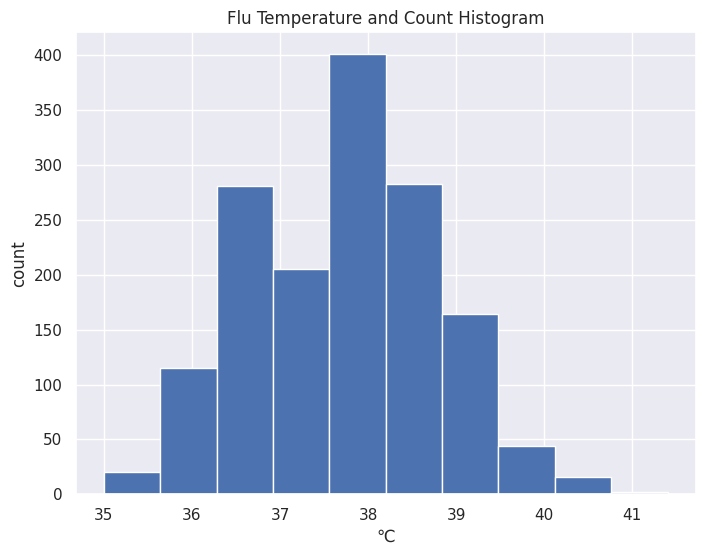

In [ ]:
plt.figure(figsize=(8, 6));
plt.hist(boston_pd['as_edenroll_temp']);
plt.title('Flu Temperature and Count Histogram');
plt.xlabel('℃');
plt.ylabel('count');
plt.show();

<ipython-input-51-fd2b10f650fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_pd['as_edenroll_temp'], fit=stats.norm);


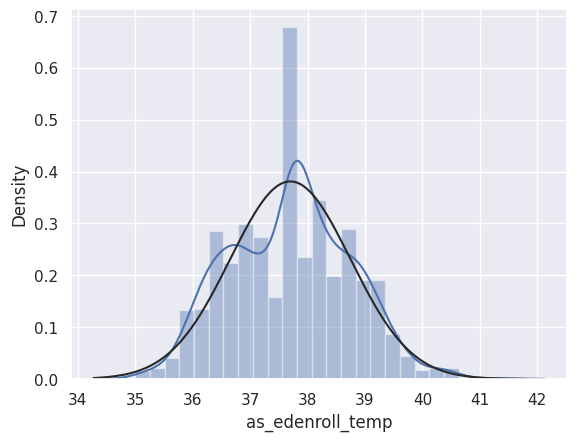

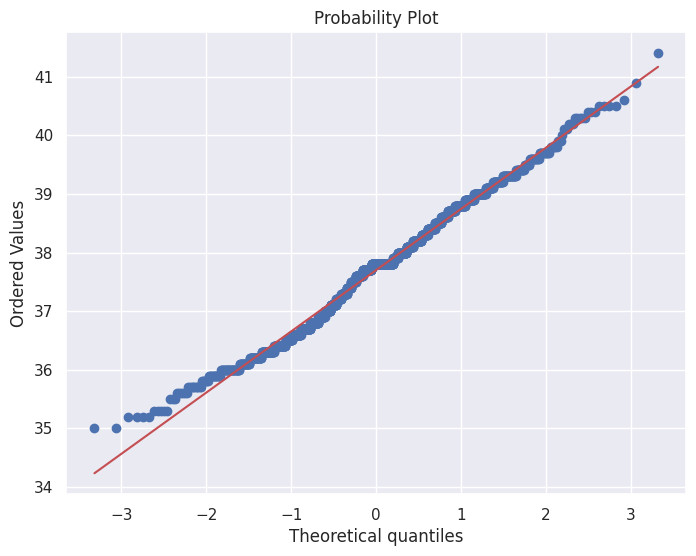

In [ ]:
from scipy.stats import norm
sns.distplot(boston_pd['as_edenroll_temp'], fit=stats.norm);
plt.figure(figsize=(8, 6));
res = stats.probplot(boston_pd['as_edenroll_temp'], plot=plt);

<ipython-input-52-65d82eae9762>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_pd[feature_name], hist=True, ax=ax[i]);
<ipython-input-52-65d82eae9762>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_pd[feature_name], hist=True, ax=ax[i]);
<ipython-input-52-65d82eae9762>:5: UserW

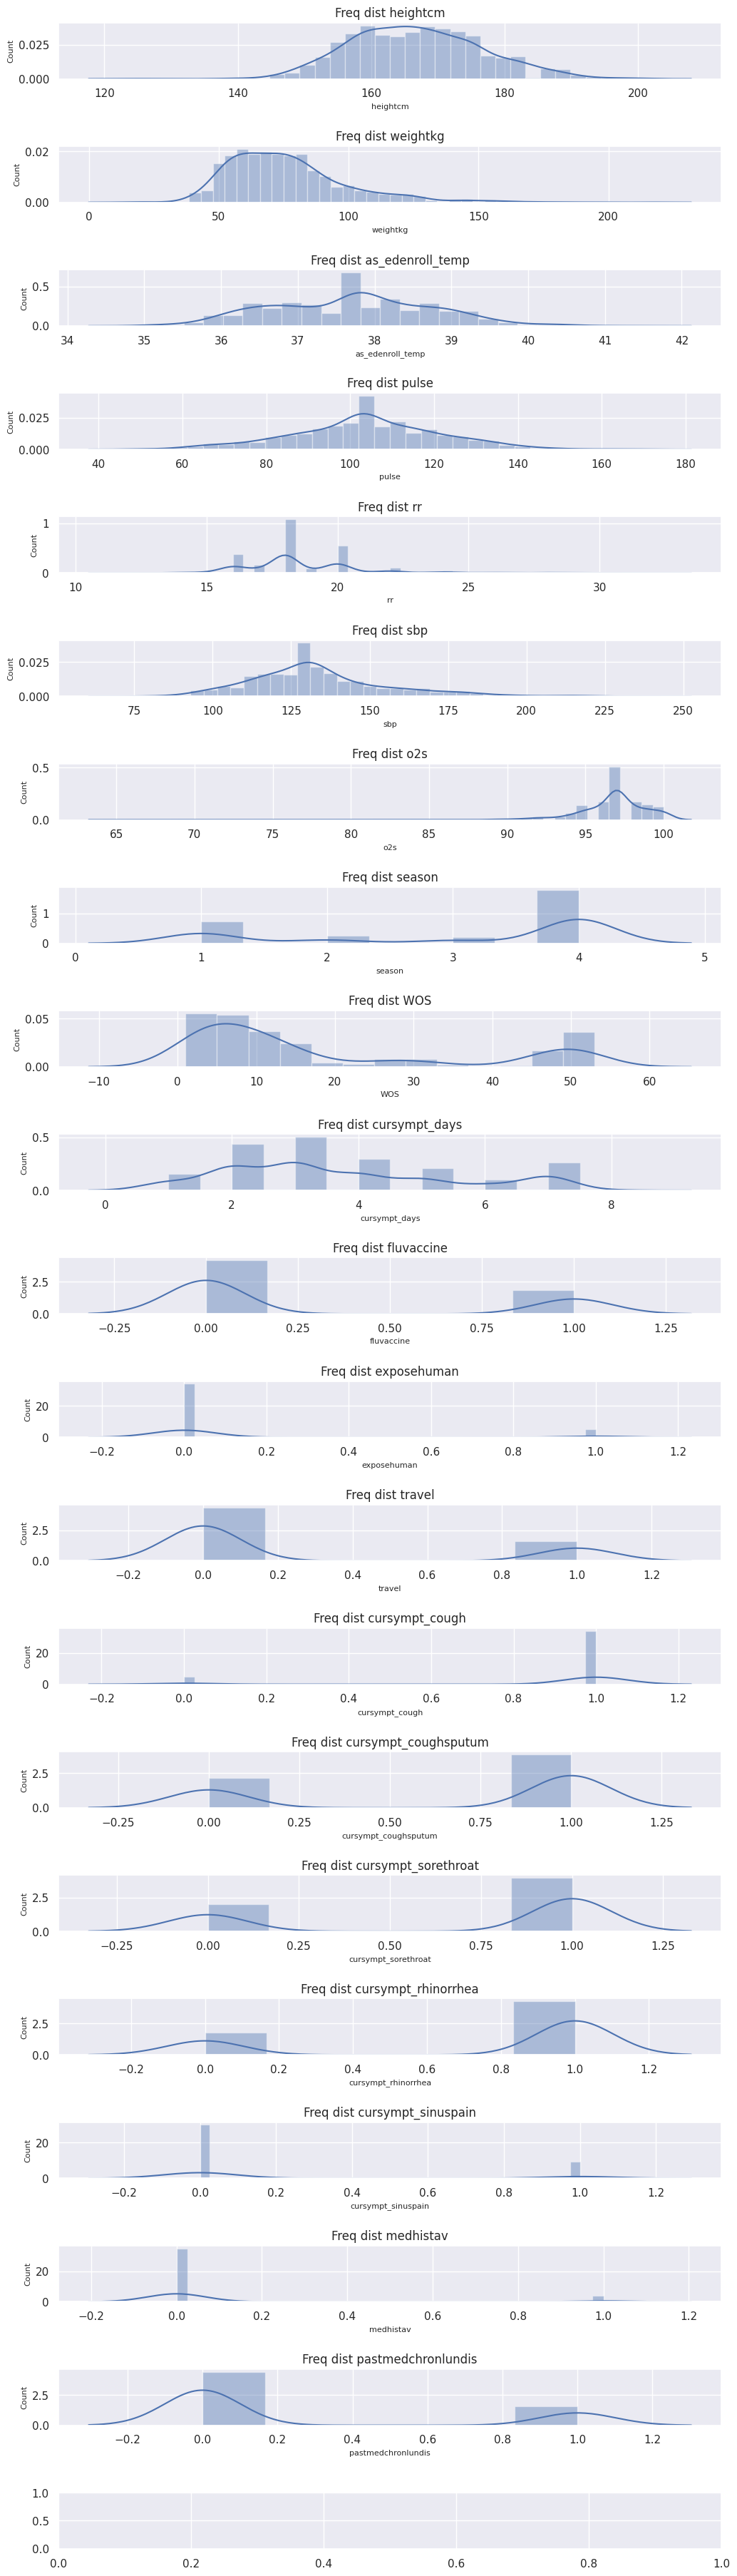

In [ ]:
fig,  ax = plt.subplots(len(list(boston_pd.columns)), figsize=(12,46))

for i, feature_name in enumerate(list(boston_pd.columns)):
    if (feature_name != 'GeneXpert'):
        sns.distplot(boston_pd[feature_name], hist=True, ax=ax[i]);
        ax[i].set_ylabel('Count', fontsize=8);
        ax[i].set_xlabel("{}".format(feature_name), fontsize=8);
        ax[i].set_title("Freq dist "+feature_name, fontsize=12);
plt.subplots_adjust(hspace=1.2)
plt.show();


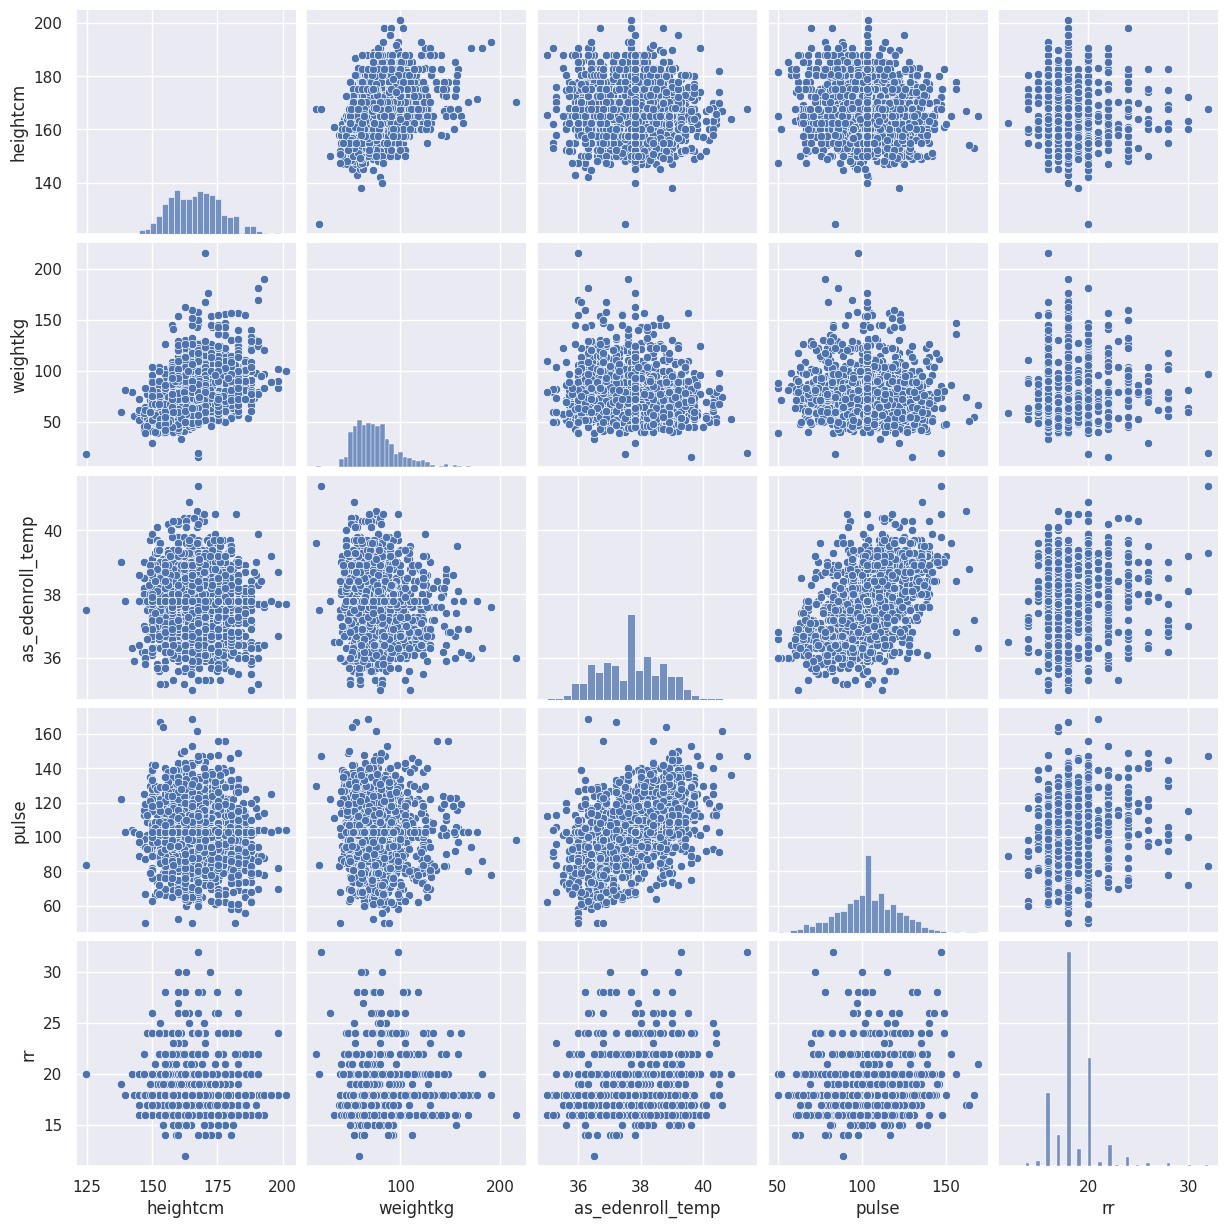

In [ ]:
sns.pairplot(boston_pd.iloc[:,0:5]);

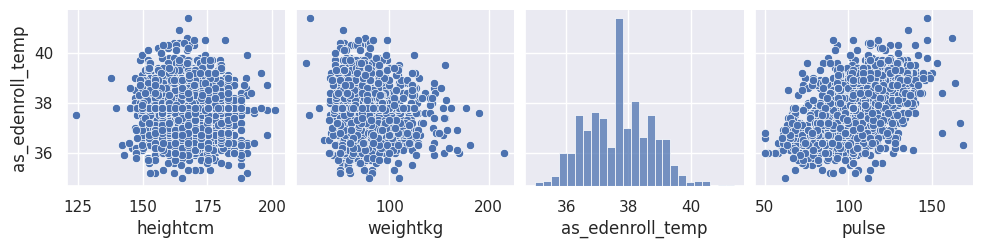

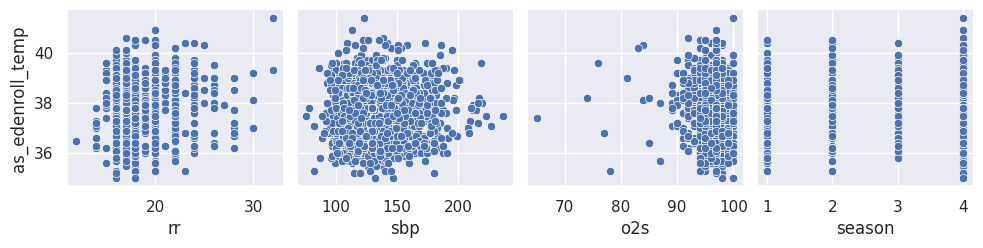

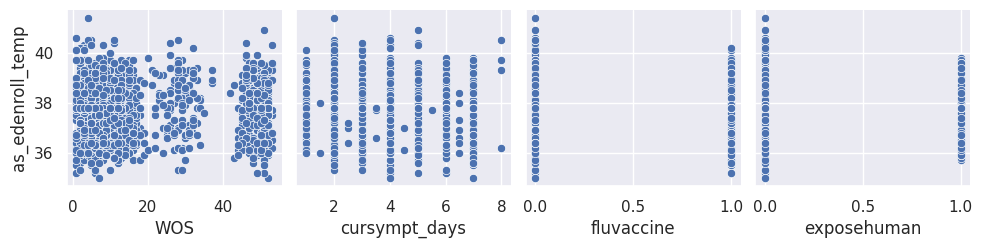

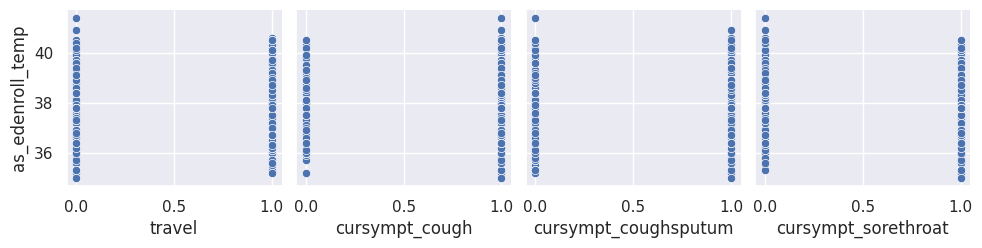

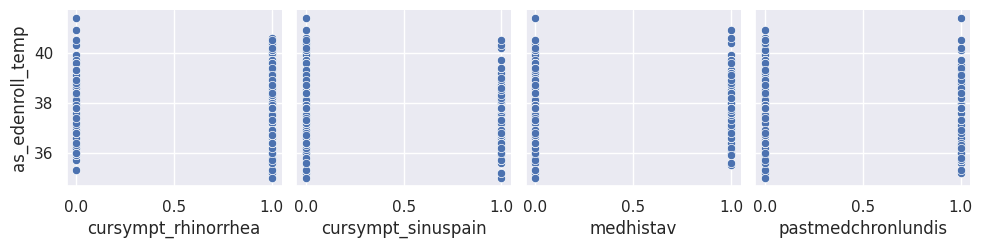

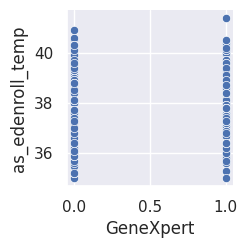

In [ ]:
n = 4
for i in range(0, len(boston_pd.columns), n):
    sns.pairplot(data=boston_pd,
                x_vars=boston_pd.columns[i:i+n],
                y_vars=['as_edenroll_temp']);

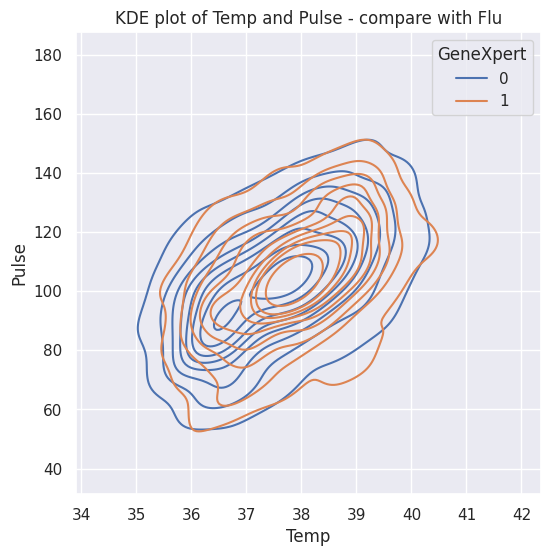

In [ ]:
fig = plt.figure(figsize=(6,6)); # define plot area
ax = fig.gca(); # define axis
sns.kdeplot(
    data=boston_pd, x="as_edenroll_temp", y="pulse", hue="GeneXpert", fill=False#,cmap="Blues_d"
)
ax.set_title('KDE plot of Temp and Pulse - compare with Flu'); # Give the plot a main title
ax.set_xlabel('Temp');  # Set text for the x axis
ax.set_ylabel('Pulse'); # Set text for y axis

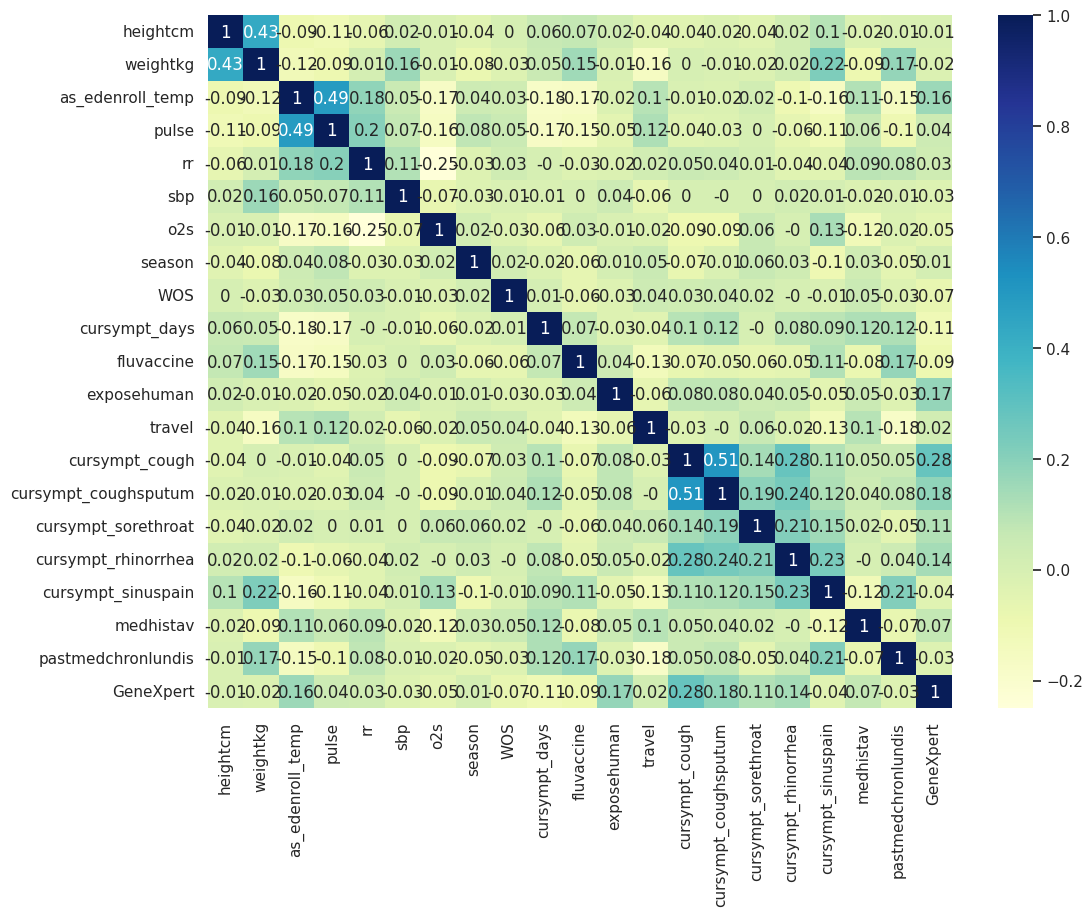

In [ ]:
plt.figure(figsize=(12, 9));
correlation_matrix = boston_pd.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

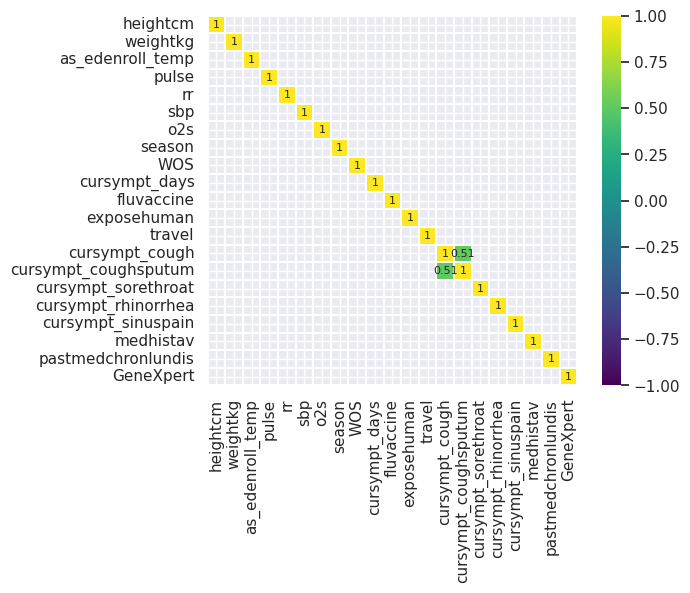

In [ ]:
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
import operator

individual_features_df = []
for i in range(0, len(boston_pd.columns) - 1): # -1 because the last column is PRICE
    tmpDf = boston_pd[[boston_pd.columns[i], 'GeneXpert']]
    #tmpDf = tmpDf[tmpDf[boston_pd.columns[i]] != 0] # remove values that are zero
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['GeneXpert'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

  cursympt_days: -0.10944411412183828
     fluvaccine: -0.09194201570078137
            WOS: -0.06594137545676285
            o2s: -0.04976757545017057
cursympt_sinuspain: -0.03530065426719736
pastmedchronlundis: -0.03474206665613735
            sbp: -0.02861920316846879
       weightkg: -0.021586892582431075
       heightcm: -0.014185623657366597
         season: 0.01198744762783179
         travel: 0.016768146774554907
             rr: 0.03191022279057966
          pulse: 0.04298784215207937
      medhistav: 0.06730086546602836
cursympt_sorethroat: 0.10582625780246424
cursympt_rhinorrhea: 0.14100113277659532
as_edenroll_temp: 0.1625358062920415
    exposehuman: 0.1653384820301127
cursympt_coughsputum: 0.17681051250686555
 cursympt_cough: 0.2798161286495342


In [ ]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
n = len(golden_features_list)
print("There is {} strongly correlated values with GeneXpert:".format(n))
for var in golden_features_list:
    print("\t {}".format(var))

There is 0 strongly correlated values with GeneXpert:


<!-- **Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.**

## Thank you. -->